In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

In [21]:
GMT = pd.read_csv('../data/Proj/UseData/Crawled_Unique_MTs.csv', encoding='cp949')
BMT = pd.read_csv('../data/Proj/UseData/Crawled_Unique_BMTs.csv', encoding='cp949')
list_100 = pd.read_csv('../data/Proj/UseData/100_name_list.csv')
plus_100 = pd.read_csv('../data/Proj/UseData/100_plus_list.csv')

In [22]:
plus_100

,name
0,승학산
1,장산
2,고려산
3,갑하산
4,계족산
...,...
95,웅석봉
96,우두산
97,월봉산
98,장복산


In [23]:
GMT.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
BMT.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
list_100.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)

In [24]:
GMT = GMT[GMT['MNTN_HEIGHT'] > 0]
BMT = BMT[BMT['MNTN_HEIGHT'] > 0]

In [25]:
list_100.rename(columns={'0':'name'}, inplace=True)

In [26]:
GMT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 0 to 1550
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MNTN_CODE    1080 non-null   int64  
 1   MNTN_NM      1080 non-null   object 
 2   MNTN_LOC     703 non-null    object 
 3   MNTN_HEIGHT  1080 non-null   int64  
 4   ROAD_EASY    1080 non-null   float64
 5   ROAD_MID     1080 non-null   float64
 6   ROAD_DIFF    1080 non-null   float64
 7   ROAD_SUM     1080 non-null   float64
 8   MNTN_RES     1080 non-null   object 
 9   Sel_Cos      1080 non-null   float64
 10  Raw_Cos      1080 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 101.2+ KB


In [27]:
BMT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 659
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MNTN_CODE    364 non-null    int64  
 1   MNTN_NM      364 non-null    object 
 2   MNTN_LOC     111 non-null    object 
 3   MNTN_HEIGHT  364 non-null    int64  
 4   ROAD_EASY    364 non-null    float64
 5   ROAD_MID     364 non-null    float64
 6   ROAD_DIFF    364 non-null    float64
 7   ROAD_SUM     364 non-null    float64
 8   MNTN_RES     364 non-null    object 
 9   Sel_Cos      364 non-null    float64
 10  Raw_Cos      364 non-null    float64
 11  class        364 non-null    int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 37.0+ KB


In [28]:
cnt = 0
for i in range(len(GMT)):
    if GMT.iloc[i]['MNTN_NM'] in list(plus_100['name']):
        cnt += 1
cnt

72

In [29]:
column = list(GMT.columns)
goodmn = list(list_100['name'].values)

In [30]:
mntn_nm = pd.read_csv('../data/Proj/MT_rname.csv')

#### 100대 명산 데이터 프레임

In [31]:
GMT_100 = pd.DataFrame(columns = column)

In [32]:
for i in range(len(GMT)):
    if GMT.iloc[i,1] in goodmn:
        GMT_100 = GMT_100.append(pd.DataFrame([list(GMT.iloc[i].values)], columns = column), ignore_index=True)

In [33]:
GMT_100

,MNTN_CODE,MNTN_NM,MNTN_LOC,MNTN_HEIGHT,ROAD_EASY,ROAD_MID,ROAD_DIFF,ROAD_SUM,MNTN_RES,Sel_Cos,Raw_Cos
0,487403301,화왕산,경상남도 창녕군 창녕읍 옥천리 일대,758,39.39,1.61,0.0,41.00,<item><crcmrsghtngetcimageseq>http://www.fores...,0.751809,0.171892
1,483302101,천성산,"경상남도 양산시 하북면, 상북면, 웅상읍",920,178.70,0.43,0.0,179.13,<item><crcmrsghtngetcimageseq>http://www.fores...,0.859727,0.194907
2,418204301,화악산,"경기도 가평군 북면, 강원도 화천군 사내면",1468,114.34,3.30,0.0,117.64,<item><crcmrsghtngetcimageseq>http://www.fores...,0.807573,0.175589
3,437200401,구병산,"경상북도 상주시 화남면 평온리, 보은군 마로면 적암리, 외속리면 구병리",877,21.92,0.00,0.0,21.92,<item><crcmrsghtngetcimageseq>http://www.fores...,0.751809,0.178697
4,437403801,황악산,경상북도 김천시 대항면 운수리,1111,5.34,0.00,0.0,5.34,<item><crcmrsghtngetcimageseq>http://www.fores...,0.807573,0.175589
...,...,...,...,...,...,...,...,...,...,...,...
72,478202401,운문산,경상남도 밀양,1196,66.52,0.86,0.0,67.38,<item><crcmrsghtngetcimageseq>http://www.fores...,0.510754,0.137487
73,416502601,운악산,"경기도 가평군 하면, 포천시 화현면",935,20.84,2.35,0.0,23.19,<item><crcmrsghtngetcimageseq>http://www.fores...,0.807573,0.170283
74,482704101,재약산,"경상남도 밀양시 단장면ㆍ산내면, 울산광역시 울주군 상북면",1119,65.94,1.35,0.0,67.29,<item><crcmrsghtngetcimageseq>http://www.fores...,0.859727,0.193489
75,451400201,미륵산,강원도 원주시 귀래면,696,107.34,0.18,0.0,107.52,<item><crcmrsghtngetcimageseq>http://www.fores...,0.510754,0.110887


In [34]:
GMT_100['class'] = 1

#### Train data set

In [36]:
MT_tr = pd.concat([GMT_100, BMT])

In [37]:
MT_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 0 to 659
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MNTN_CODE    441 non-null    object 
 1   MNTN_NM      441 non-null    object 
 2   MNTN_LOC     187 non-null    object 
 3   MNTN_HEIGHT  441 non-null    object 
 4   ROAD_EASY    441 non-null    float64
 5   ROAD_MID     441 non-null    float64
 6   ROAD_DIFF    441 non-null    float64
 7   ROAD_SUM     441 non-null    float64
 8   MNTN_RES     441 non-null    object 
 9   Sel_Cos      441 non-null    float64
 10  Raw_Cos      441 non-null    float64
 11  class        441 non-null    int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 44.8+ KB


## Train data model training
- using feature
    ['MNTN_HEIGHT', 'ROAD_EASY', 'ROAD_MID', 'ROAD_DIFF', 'Sel_Cos', 'Raw_Cos', 'class']

In [39]:
MT_train = MT_tr[['MNTN_HEIGHT', 'ROAD_EASY', 'ROAD_MID', 'ROAD_DIFF', 'Sel_Cos', 'Raw_Cos', 'class']]
MT_train

,MNTN_HEIGHT,ROAD_EASY,ROAD_MID,ROAD_DIFF,Sel_Cos,Raw_Cos,class
0,758,39.39,1.61,0.0,0.751809,0.171892,1
1,920,178.70,0.43,0.0,0.859727,0.194907,1
2,1468,114.34,3.30,0.0,0.807573,0.175589,1
3,877,21.92,0.00,0.0,0.751809,0.178697,1
4,1111,5.34,0.00,0.0,0.807573,0.175589,1
...,...,...,...,...,...,...,...
655,127,1.88,0.00,0.0,0.000000,0.000000,0
656,368,2.16,0.00,0.0,0.000000,0.000000,0
657,1036,9.78,0.00,0.0,0.551677,0.091880,0
658,368,4.62,0.00,0.0,0.000000,0.000000,0


In [40]:
MT_train.to_csv('../data/Proj/UseData/MT_train_z.csv', encoding='utf-8', index=False)

In [41]:
MT_train = pd.read_csv('../data/Proj/UseData/MT_train_z.csv')
MT_train

,MNTN_HEIGHT,ROAD_EASY,ROAD_MID,ROAD_DIFF,Sel_Cos,Raw_Cos,class
0,758,39.39,1.61,0.0,0.751809,0.171892,1
1,920,178.70,0.43,0.0,0.859727,0.194907,1
2,1468,114.34,3.30,0.0,0.807573,0.175589,1
3,877,21.92,0.00,0.0,0.751809,0.178697,1
4,1111,5.34,0.00,0.0,0.807573,0.175589,1
...,...,...,...,...,...,...,...
436,127,1.88,0.00,0.0,0.000000,0.000000,0
437,368,2.16,0.00,0.0,0.000000,0.000000,0
438,1036,9.78,0.00,0.0,0.551677,0.091880,0
439,368,4.62,0.00,0.0,0.000000,0.000000,0


In [126]:
MT_train.corr()

,MNTN_HEIGHT,ROAD_EASY,ROAD_MID,ROAD_DIFF,Sel_Cos,Raw_Cos,class
MNTN_HEIGHT,1.000000,0.414664,0.314826,-0.021301,0.674102,0.673965,0.554011
ROAD_EASY,0.414664,1.000000,0.484171,-0.001590,0.428066,0.455618,0.495437
ROAD_MID,0.314826,0.484171,1.000000,-0.006579,0.328513,0.346767,0.419043
ROAD_DIFF,-0.021301,-0.001590,-0.006579,1.000000,-0.036534,-0.040126,-0.019424
Sel_Cos,0.674102,0.428066,0.328513,-0.036534,1.000000,0.960312,0.792106
Raw_Cos,0.673965,0.455618,0.346767,-0.040126,0.960312,1.000000,0.765446
class,0.554011,0.495437,0.419043,-0.019424,0.792106,0.765446,1.000000


<AxesSubplot:title={'center':'Correlation of Features'}>

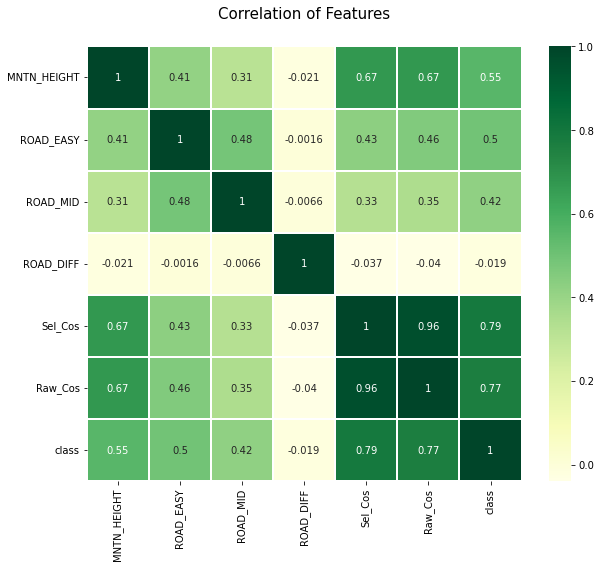

In [130]:
colormap = plt.cm.YlGn 
plt.figure(figsize=(10, 8)) 
plt.title("Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(MT_train.corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10})

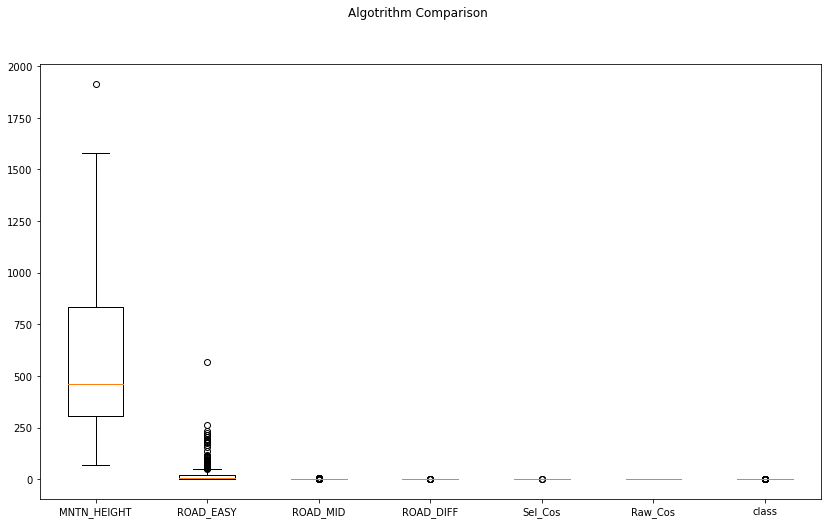

In [45]:
fig = plt.figure(figsize=(14,8))
fig.suptitle('Algotrithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(MT_train)
ax.set_xticklabels(MT_train.columns)
plt.show()

#### label 불균형

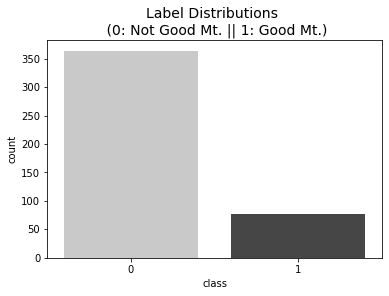

In [137]:
pal = ['#C9C9C9', '#464646']
sns.countplot('class', data=MT_train, palette=pal)
plt.title('Label Distributions \n (0: Not Good Mt. || 1: Good Mt.)', fontsize=14)
plt.show()

In [140]:
X = MT_train.iloc[:,:-1]
y = MT_train.iloc[:,-1]

X.shape, y.shape

((441, 6), (441,))

In [141]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
re_X, re_y = smote.fit_resample(X, y)
re_X.shape, re_y.shape

((728, 6), (728,))

In [145]:
xs = StandardScaler()
sc_X = xs.fit_transform(re_X)

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sc_X, re_y, test_size=0.2, random_state=13)

#### 성능확인을 위한 함수

In [51]:
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    return get_clf_eval(y_test, pred)

In [52]:
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    tmp = []
    
    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))
        
    return pd.DataFrame(tmp, columns=col_names, index=model_names)

In [53]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    return acc, pre, re, f1, auc

In [54]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    
    print('=> confusion matrix')
    print(confusion)
    print('=============')
    
    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc, pre))
    print('Recall: {0:.4f}, F1: {1:.4f}, AUC:{2:.4f}'.format(re, f1, auc))

### 모델 학습

In [55]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingRegressor

In [56]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

=> confusion matrix
[[69  6]
 [ 0 71]]
Accuracy: 0.9589, Precision: 0.9221
Recall: 1.0000, F1: 0.9595, AUC:0.9600


In [57]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

=> confusion matrix
[[72  3]
 [ 0 71]]
Accuracy: 0.9795, Precision: 0.9595
Recall: 1.0000, F1: 0.9793, AUC:0.9800


In [91]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

=> confusion matrix
[[75  0]
 [ 0 71]]
Accuracy: 1.0000, Precision: 1.0000
Recall: 1.0000, F1: 1.0000, AUC:1.0000


In [147]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

pipe = Pipeline([('clf', RandomForestClassifier())])

search_space = [{'clf': [DecisionTreeClassifier()],
                 'clf__max_depth': [3, 5, 10],
                 'clf__random_state': [10, 13, 15]},
                {'clf': [RandomForestClassifier()],
                 'clf__n_estimators': [10, 100, 1000],
                 'clf__max_depth': [3, 5, 10],
                 'clf__random_state': [10, 13, 15]},
                {'clf': [AdaBoostClassifier()],
                 'clf__n_estimators': [30, 100, 1000],
                 'clf__learning_rate': [1.0, 0.5, 0.1],
                 'clf__random_state': [10, 13, 15]},
                {'clf': [GradientBoostingClassifier()],
                 'clf__n_estimators' : [100, 500],
                 'clf__learning_rate' : [0.05, 0.1]},
                {'clf': [XGBClassifier()],
                 'clf__n_estimators': [100, 400],
                 'clf__learning_rate': [0.1, 0.3, 0.6],
                 'clf__max_depth': [3, 5, 10]}]

In [148]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)
best_model = clf.fit(X_train, y_train)

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[00:16:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:56] WARNING: /Users/runner/miniforge3/cond

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[00:16:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[00:16:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[00:16:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:57] WARNING: /Users/runner/miniforge3/cond

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[00:16:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[00:16:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:57] WARNING: /Users/runner/miniforge3/cond

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[00:16:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:16:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[00:16:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:58] WARNING: /Users/runner/miniforge3/cond

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:16:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:16:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[00:16:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:59] WARNING: /Users/runner/miniforge3/cond

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:16:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:16:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:16:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:17:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[00:17:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:00] WARNING: /Users/runner/miniforge3/cond

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:17:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:17:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[00:17:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:01] WARNING: /Users/runner/miniforge3/cond

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[00:17:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[00:17:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[00:17:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:02] WARNING: /Users/runner/miniforge3/cond

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[00:17:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[00:17:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:02] WARNING: /Users/runner/miniforge3/cond

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs

[00:17:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:02] WARNING: /Users/runner/miniforge3/cond

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:17:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:17:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [149]:
best_model.best_estimator_

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=5,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [154]:
best_df_clf = best_model.best_estimator_
pred1 = best_df_clf.predict(X_test)

print_clf_eval(y_test, pred1)

=> confusion matrix
[[73  2]
 [ 0 71]]
Accuracy: 0.9863, Precision: 0.9726
Recall: 1.0000, F1: 0.9861, AUC:0.9867


In [152]:
best_model.best_params_

{'clf': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None,
               enable_categorical=False, gamma=None, gpu_id=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.1, max_delta_step=None, max_depth=5,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, reg_alpha=None,
               reg_lambda=None, scale_pos_weight=None, subsample=None,
               tree_method=None, validate_parameters=None, verbosity=None),
 'clf__learning_rate': 0.1,
 'clf__max_depth': 5,
 'clf__n_estimators': 100}

In [163]:
xg_clf = XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None,
               enable_categorical=False, gamma=None, gpu_id=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.1, max_delta_step=None, max_depth=5,
               min_child_weight=None, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, reg_alpha=None,
               reg_lambda=None, scale_pos_weight=None, subsample=None,
               tree_method=None, validate_parameters=None, verbosity=None)
xg_clf.fit(X_train, y_train)
xg_pred = xg_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

[00:23:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
=> confusion matrix
[[75  0]
 [ 0 71]]
Accuracy: 1.0000, Precision: 1.0000
Recall: 1.0000, F1: 1.0000, AUC:1.0000


/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [175]:
best_cols_values = xg_clf.feature_importances_
best_cols = pd.Series(best_cols_values, index=MT_train.columns[:-1])
top_cols = best_cols.sort_values(ascending=False)
top_cols

Raw_Cos        0.721241
ROAD_EASY      0.193903
ROAD_MID       0.058096
Sel_Cos        0.015415
MNTN_HEIGHT    0.011345
ROAD_DIFF      0.000000
dtype: float32

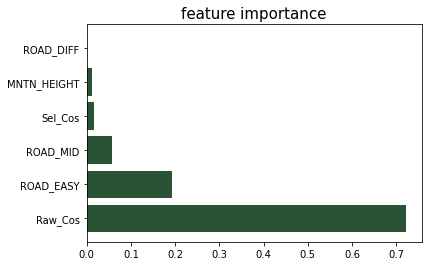

In [177]:
plt.barh(top_cols.index, top_cols.values, color='#2A5234')
plt.title('feature importance', fontsize=15)
plt.show()

## Test data predict

In [63]:
mn = list(list_100['name'])

In [64]:
temp = GMT
temp

,MNTN_CODE,MNTN_NM,MNTN_LOC,MNTN_HEIGHT,ROAD_EASY,ROAD_MID,ROAD_DIFF,ROAD_SUM,MNTN_RES,Sel_Cos,Raw_Cos
0,301100101,강바위산,NaN,382,4.42,0.00,0.0,4.42,[],0.000000,0.000000
1,441801501,양각산,경상남도 거창군 웅양면 산포리,1158,35.54,0.99,0.0,36.53,<item><crcmrsghtngetcimageseq>http://www.fores...,0.722315,0.170821
4,457302401,박석산,NaN,595,10.52,0.00,0.0,10.52,[],0.000000,0.000000
5,481700701,망진산,경상남도 진주시,172,10.72,0.00,0.0,10.72,<item><crcmrsghtngetcimageseq>http://www.fores...,0.361158,0.140784
6,421101701,마적산,"강원도 춘천시 신북읍, 북산면",610,25.55,1.16,0.0,26.71,<item><crcmrsghtngetcimageseq>http://www.fores...,0.589768,0.113342
...,...,...,...,...,...,...,...,...,...,...,...
1542,461100701,양을산,전라남도 목포,151,9.48,0.00,0.0,9.48,<item><crcmrsghtngetcimageseq>http://www.fores...,0.000000,0.027094
1544,441502801,월성산,NaN,312,15.51,0.08,0.0,15.59,[],0.000000,0.000000
1546,418200601,고동산,"경기도 가평군 설악면, 양평군 서종면",600,23.41,0.00,0.0,23.41,<item><crcmrsghtngetcimageseq>http://www.fores...,0.294884,0.069076
1549,488700401,금대산,NaN,89,2.60,0.00,0.0,2.60,[],0.000000,0.000000


In [65]:
MT_tt = pd.DataFrame(columns = GMT.columns)

In [66]:
idx_lt = []
for i in range(len(temp)):
    if temp.iloc[i]['MNTN_NM'] in mn:
        continue
    else:
        MT_tt = MT_tt.append(pd.DataFrame([list(temp.iloc[i])], columns = GMT.columns), ignore_index=True)
MT_tt

,MNTN_CODE,MNTN_NM,MNTN_LOC,MNTN_HEIGHT,ROAD_EASY,ROAD_MID,ROAD_DIFF,ROAD_SUM,MNTN_RES,Sel_Cos,Raw_Cos
0,301100101,강바위산,NaN,382,4.42,0.00,0.0,4.42,[],0.000000,0.000000
1,441801501,양각산,경상남도 거창군 웅양면 산포리,1158,35.54,0.99,0.0,36.53,<item><crcmrsghtngetcimageseq>http://www.fores...,0.722315,0.170821
2,457302401,박석산,NaN,595,10.52,0.00,0.0,10.52,[],0.000000,0.000000
3,481700701,망진산,경상남도 진주시,172,10.72,0.00,0.0,10.72,<item><crcmrsghtngetcimageseq>http://www.fores...,0.361158,0.140784
4,421101701,마적산,"강원도 춘천시 신북읍, 북산면",610,25.55,1.16,0.0,26.71,<item><crcmrsghtngetcimageseq>http://www.fores...,0.589768,0.113342
...,...,...,...,...,...,...,...,...,...,...,...
998,461100701,양을산,전라남도 목포,151,9.48,0.00,0.0,9.48,<item><crcmrsghtngetcimageseq>http://www.fores...,0.000000,0.027094
999,441502801,월성산,NaN,312,15.51,0.08,0.0,15.59,[],0.000000,0.000000
1000,418200601,고동산,"경기도 가평군 설악면, 양평군 서종면",600,23.41,0.00,0.0,23.41,<item><crcmrsghtngetcimageseq>http://www.fores...,0.294884,0.069076
1001,488700401,금대산,NaN,89,2.60,0.00,0.0,2.60,[],0.000000,0.000000


In [67]:
MT_test = MT_tt[['MNTN_HEIGHT', 'ROAD_EASY', 'ROAD_MID', 'ROAD_DIFF', 'Sel_Cos', 'Raw_Cos']]
MT_test.to_csv('../data/Proj/UseData/MT_test_z.csv', encoding='utf-8', index=False)

In [69]:
MT_test = pd.read_csv('../data/Proj/UseData/MT_test_z.csv')

In [70]:
MT_test

,MNTN_HEIGHT,ROAD_EASY,ROAD_MID,ROAD_DIFF,Sel_Cos,Raw_Cos
0,382,4.42,0.00,0.0,0.000000,0.000000
1,1158,35.54,0.99,0.0,0.722315,0.170821
2,595,10.52,0.00,0.0,0.000000,0.000000
3,172,10.72,0.00,0.0,0.361158,0.140784
4,610,25.55,1.16,0.0,0.589768,0.113342
...,...,...,...,...,...,...
998,151,9.48,0.00,0.0,0.000000,0.027094
999,312,15.51,0.08,0.0,0.000000,0.000000
1000,600,23.41,0.00,0.0,0.294884,0.069076
1001,89,2.60,0.00,0.0,0.000000,0.000000


In [119]:
rs = StandardScaler()
sc_test = rs.fit_transform(MT_test)

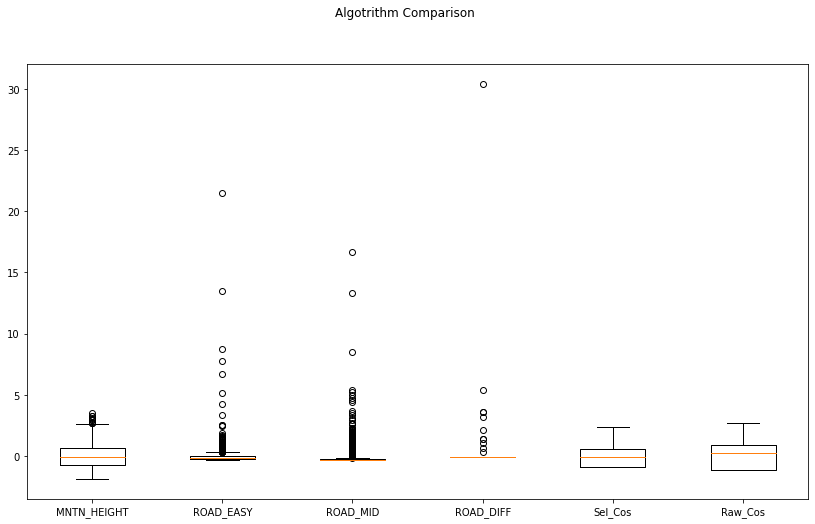

In [120]:
fig = plt.figure(figsize=(14,8))
fig.suptitle('Algotrithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(sc_test)
ax.set_xticklabels(MT_test.columns)
plt.show()

#### predict

#### test data에 robustscaler

In [121]:
best_df_clf = best_model.best_estimator_
pred_prb =best_df_clf.predict_proba(sc_test)
pred_test = best_df_clf.predict(sc_test)

pred_test

/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/hongseongmi/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0, 1, 0, ..., 0, 0, 1])

In [122]:
test_rob = MT_tt
test_rob['class'] = list(pred_test)
test_rob['prob'] = list(pred_prb)
test_rob

,MNTN_CODE,MNTN_NM,MNTN_LOC,MNTN_HEIGHT,ROAD_EASY,ROAD_MID,ROAD_DIFF,ROAD_SUM,MNTN_RES,Sel_Cos,Raw_Cos,class,prob
0,301100101,강바위산,NaN,382,4.42,0.00,0.0,4.42,[],0.000000,0.000000,0,"[0.999176, 0.0008239826]"
1,441801501,양각산,경상남도 거창군 웅양면 산포리,1158,35.54,0.99,0.0,36.53,<item><crcmrsghtngetcimageseq>http://www.fores...,0.722315,0.170821,1,"[0.022274494, 0.9777255]"
2,457302401,박석산,NaN,595,10.52,0.00,0.0,10.52,[],0.000000,0.000000,0,"[0.999176, 0.0008239826]"
3,481700701,망진산,경상남도 진주시,172,10.72,0.00,0.0,10.72,<item><crcmrsghtngetcimageseq>http://www.fores...,0.361158,0.140784,1,"[0.27123058, 0.7287694]"
4,421101701,마적산,"강원도 춘천시 신북읍, 북산면",610,25.55,1.16,0.0,26.71,<item><crcmrsghtngetcimageseq>http://www.fores...,0.589768,0.113342,1,"[0.022274494, 0.9777255]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,461100701,양을산,전라남도 목포,151,9.48,0.00,0.0,9.48,<item><crcmrsghtngetcimageseq>http://www.fores...,0.000000,0.027094,0,"[0.999176, 0.0008239826]"
999,441502801,월성산,NaN,312,15.51,0.08,0.0,15.59,[],0.000000,0.000000,0,"[0.999176, 0.0008239826]"
1000,418200601,고동산,"경기도 가평군 설악면, 양평군 서종면",600,23.41,0.00,0.0,23.41,<item><crcmrsghtngetcimageseq>http://www.fores...,0.294884,0.069076,0,"[0.7724775, 0.22752248]"
1001,488700401,금대산,NaN,89,2.60,0.00,0.0,2.60,[],0.000000,0.000000,0,"[0.999176, 0.0008239826]"


In [123]:
prob0 = []
prob1 = []
for prob in list(pred_prb):
    prob0.append(prob[0])
    prob1.append(prob[1])

In [124]:
len(list(test_rob[test_rob['class'] == 1]['MNTN_NM'].values))

520

In [125]:
cnt = 0
plus2good = []

for i in range(520):
    if list(test_rob[test_rob['class'] == 1]['MNTN_NM'])[i] in list(plus_100['name']):
        cnt += 1
        plus2good.append(list(test_rob[test_rob['class'] == 1]['MNTN_NM'])[i])
cnt, plus2good

(58,
 ['기백산',
  '유학산',
  '백화산',
  '노추산',
  '거류산',
  '만덕산',
  '병풍산',
  '민둥산',
  '와룡산',
  '구봉대산',
  '비계산',
  '단석산',
  '월봉산',
  '불곡산',
  '아미산',
  '석화산',
  '무척산',
  '화야산',
  '금강산',
  '중원산',
  '초암산',
  '흑석산',
  '주금산',
  '백아산',
  '마대산',
  '일월산',
  '종자산',
  '갑장산',
  '천등산',
  '제암산',
  '사명산',
  '도장산',
  '승학산',
  '팔각산',
  '신어산',
  '금학산',
  '진악산',
  '회문산',
  '영취산',
  '운무산',
  '갑하산',
  '가은산',
  '토함산',
  '광교산',
  '검단산',
  '우두산',
  '고덕산',
  '갑장산',
  '계족산',
  '굴암산',
  '갈기산',
  '고려산',
  '식장산',
  '벽방산',
  '모후산',
  '구봉대산',
  '흑성산',
  '장복산'])

In [107]:
test_rob[test_rob['class'] == 1]['MNTN_NM']

1       양각산
3       망진산
4       마적산
6       이방산
7       함백산
       ... 
991     달음산
993     장복산
994     적석산
996     소리산
1002    옥교산
Name: MNTN_NM, Length: 520, dtype: object

In [108]:
import random

rand_ch = [0] * 5
for i in range(5):
    num = random.randrange(153)
    rand_ch[i] = num
rand_ch

[27, 116, 92, 138, 46]

In [109]:
for idx in rand_ch:
    print(list(test_rob[test_rob['class'] == 1]['MNTN_NM'].values)[idx])

월이산
지각산
발왕산
단석산
목우산


In [110]:
len(list(test_rob[test_rob['class'] == 0]['MNTN_NM']))

483

In [114]:
cnt = 0
plus2bad = []

for i in range(483):
    if list(test_rob[test_rob['class'] == 0]['MNTN_NM'])[i] in list(plus_100['name']):
        cnt += 1
        plus2bad.append(list(test_rob[test_rob['class'] == 0]['MNTN_NM'])[i])
cnt, plus2bad

(2, ['대봉산', '수도산'])

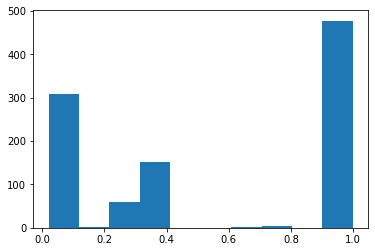

In [111]:
plt.hist(prob0)
# plt.hist(prob1)
plt.show()